# 주제 : 과거 코로나19 확진자/사망자 데이터를 통한 추세 예측
----------

## 데이터 소개
    - John Hopkins 대학의 COVID-19 데이터셋을 사용합니다.
    
    - 총 10개의 파일 중 2개의 Raw 데이터를 사용합니다.
      - RAW_global_confirmed_cases.csv
      - RAW_global_deaths.csv

    - 각 파일의 컬럼은 아래와 같습니다.
      - Country/Region: 국가
      - Province/State: 지방/주
      - Lat: 지역의 위도
      - Long: 지역의 경도
      - 날짜: 각 날짜의 확진자/사망자 수
    
- 데이터 출처: https://www.kaggle.com/antgoldbloom/covid19-data-from-john-hopkins-university

- 출제자 : 신제용 강사
---

## Step 1. 데이터셋 준비하기

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [4]:
import os

In [5]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기

os.environ['KAGGLE_USERNAME'] = ''
os.environ['KAGGLE_KEY'] = ''

### 문제 2. 데이터 다운로드 및 압축 해제하기


In [6]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기

!rm *
!kaggle datasets download -d antgoldbloom/covid19-data-from-john-hopkins-university
!unzip '*.zip'

rm: cannot remove 'sample_data': Is a directory
  0% 0.00/6.78M [00:00<?, ?B/s]
100% 6.78M/6.78M [00:00<00:00, 62.5MB/s]
Archive:  covid19-data-from-john-hopkins-university.zip
  inflating: CONVENIENT_global_confirmed_cases.csv  
  inflating: CONVENIENT_global_deaths.csv  
  inflating: CONVENIENT_global_metadata.csv  
  inflating: CONVENIENT_us_confirmed_cases.csv  
  inflating: CONVENIENT_us_deaths.csv  
  inflating: CONVENIENT_us_metadata.csv  
  inflating: RAW_global_confirmed_cases.csv  
  inflating: RAW_global_deaths.csv   
  inflating: RAW_us_confirmed_cases.csv  
  inflating: RAW_us_deaths.csv       


### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [7]:
df_case = pd.read_csv('RAW_global_confirmed_cases.csv')
df_death = pd.read_csv('RAW_global_deaths.csv')

In [ ]:
df_case.head()

,Country/Region,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,10/14/21,10/15/21,10/16/21,10/17/21,10/18/21,10/19/21,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21,11/4/21,11/5/21,11/6/21,11/7/21,11/8/21,11/9/21,11/10/21,11/11/21,11/12/21,11/13/21,11/14/21,11/15/21,11/16/21,11/17/21,11/18/21,11/19/21,11/20/21,11/21/21,11/22/21
0,Afghanistan,NaN,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,...,155682,155688,155739,155764,155776,155801,155859,155891,155931,155940,155944,156040,156071,156124,156166,156196,156210,156250,156284,156307,156323,156363,156392,156397,156397,156397,156397,156414,156456,156487,156510,156552,156610,156649,156739,156739,156812,156864,156896,156911
1,Albania,NaN,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,176667,177108,177536,177971,178188,178804,179463,180029,180623,181252,181696,181960,182610,183282,183873,184340,184887,185300,185497,186222,186793,187363,187994,187994,189125,189355,190125,190815,191440,192013,192600,193075,193269,193856,194472,195021,195523,195988,195988,196611
2,Algeria,NaN,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,205005,205106,205199,205286,205364,205453,205529,205599,205683,205750,205822,205903,205990,206069,206160,206270,206358,206452,206566,206649,206754,206878,206995,207079,207156,207254,207385,207509,207624,207764,207873,207970,208104,208245,208380,208532,208695,208839,208952,209111
3,Andorra,NaN,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15326,15338,15338,15338,15367,15369,15382,15382,15404,15404,15404,15425,15425,15462,15505,15516,15516,15516,15516,15516,15572,15618,15618,15618,15618,15705,15717,15744,15744,15819,15819,15819,15907,15929,15972,16035,16086,16086,16086,16299
4,Angola,NaN,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,62385,62606,62789,62842,63012,63197,63340,63567,63691,63775,63861,63930,64033,64126,64226,64301,64374,64433,64458,64487,64533,64583,64612,64654,64674,64724,64762,64815,64857,64875,64899,64913,64913,64940,64968,64985,64997,65011,65024,65033


In [ ]:
df_death.head()

,Country/Region,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,10/14/21,10/15/21,10/16/21,10/17/21,10/18/21,10/19/21,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21,11/4/21,11/5/21,11/6/21,11/7/21,11/8/21,11/9/21,11/10/21,11/11/21,11/12/21,11/13/21,11/14/21,11/15/21,11/16/21,11/17/21,11/18/21,11/19/21,11/20/21,11/21/21,11/22/21
0,Afghanistan,NaN,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7238,7238,7238,7243,7246,7247,7247,7249,7252,7253,7255,7260,7262,7266,7268,7269,7272,7280,7281,7281,7284,7284,7284,7284,7284,7288,7290,7291,7292,7292,7292,7293,7294,7295,7297,7297,7361,7363,7365,7365
1,Albania,NaN,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2797,2807,2810,2820,2829,2841,2849,2855,2863,2870,2874,2880,2888,2893,2902,2909,2916,2924,2931,2937,2940,2944,2948,2948,2955,2966,2970,2975,2978,2983,2986,2990,2997,3004,3014,3022,3029,3035,3035,3049
2,Algeria,NaN,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5864,5867,5870,5872,5873,5875,5878,5881,5883,5886,5890,5894,5899,5904,5907,5913,5918,5920,5924,5927,5931,5936,5939,5941,5945,5950,5954,5960,5966,5971,5977,5984,5991,5997,6005,6009,6015,6017,6021,6026
3,Andorra,NaN,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130
4,Angola,NaN,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1653,1660,1662,1664,1670,1678,1682,1685,1693,1695,1697,1701,1702,1703,1705,1707,1708,1710,1713,1713,1716,1718,1719,1719,1720,1721,1723,1723,1725,1726,1727,1727,1727,1729,1729,1729,1729,1730,1730,1730


In [ ]:
df_case['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [ ]:
df_case.loc[df_case['Country/Region']=='Korea, South']

,Country/Region,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,10/14/21,10/15/21,10/16/21,10/17/21,10/18/21,10/19/21,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21,11/4/21,11/5/21,11/6/21,11/7/21,11/8/21,11/9/21,11/10/21,11/11/21,11/12/21,11/13/21,11/14/21,11/15/21,11/16/21,11/17/21,11/18/21,11/19/21,11/20/21,11/21/21,11/22/21
160,"Korea, South",NaN,35.907757,127.766922,1,1,2,2,3,4,4,4,4,11,12,15,15,16,19,23,24,24,25,27,28,28,28,28,28,29,30,31,31,104,204,433,602,833,977,1261,...,339361,340978,342396,343445,344518,346088,347529,348969,350476,351899,353089,354355,356305,358412,360536,362639,364700,366386,367974,370640,373120,375464,377712,379935,381694,383407,385831,388351,390719,393042,395460,397466,399591,402775,406065,409099,412311,415425,418252,420950


## Step 2. 데이터 구조 변경 및 시각화하기


### 문제 4. 데이터프레임 구조를 Date를 Index로, 지역을 Column으로 변경


In [ ]:
df_case['Country/Region'].value_counts()

China                    34
Canada                   16
France                   12
United Kingdom           12
Australia                 8
                         ..
Moldova                   1
Iran                      1
Saint Kitts and Nevis     1
Cuba                      1
Djibouti                  1
Name: Country/Region, Length: 196, dtype: int64

In [9]:
df = df_case.drop(['Lat', 'Long'], axis=1).groupby('Country/Region').sum().transpose()
df.index.name = 'Date'
df.reset_index(inplace=True)
df['Date'] = df['Date'].apply(lambda s: pd.to_datetime(str(s)))
df.set_index('Date', inplace=True)
df

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Summer Olympics 2020,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,...,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,...,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,6,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,...,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,8,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-25,157144,198292,209624,16566,65105,4141,5322127,336330,205269,1108889,580507,22696,277510,1575185,24432,646743,1679861,30060,24850,2633,533756,272063,194909,22055238,14771,684922,15514,520213,20360,38347,120009,106794,1787542,11708,5107,1751769,111077,5057897,4478,18837,...,6400,258785,1119111,411301,20,23016,2952500,12717,5121100,560345,42056,865,50656,1196688,978801,47664,16554,17493,26261,2094886,19820,26232,1,68288,716861,8678609,48125425,127337,3548842,741720,10076116,398676,192175,6,428453,1168228,459213,9977,210112,133774
2021-11-26,157171,198732,209817,16712,65130,4141,5324039,337005,206749,1121134,582504,22720,277536,1575424,24769,648472,1701633,30165,24850,2634,535115,272798,194909,22067630,14918,687410,15514,520706,20386,38353,120038,106794,1790579,11708,5107,1754443,111106,5060557,4482,18837,...,6401,259875,1131206,413664,20,23016,2955328,12717,5131012,561059,42056,865,50710,1198848,986834,47764,16566,17493,26261,2100959,19821,26236,1,69008,716988,8702611,48176523,127413,3565644,741790,10125945,398890,192381,6,429360,1181337,459479,9979,210118,133836
2021-11-27,157190,199137,209980,16712,65139,4141,5325560,337522,207984,1132805,584121,22734,277552,1575579,24769,650168,1701633,30165,24850,2636,535115,272798,194909,22076863,14992,688628,15711,521211,20386,38358,120064,106794,1792561,11708,5107,1757077,111132,5063177,4489,18837,...,6401,261636,1143068,415898,20,23016,2958548,12717,5131012,561778,42056,865,50741,1198848,986834,47764,16578,17493,26261,2100959,19822,26241,1,69680,717163,8726370,48201079,127423,3580671,741858,10165779,399181,192599,6,430046,1197404,459479,9981,210138,133836


In [8]:
def fix_dataframe(df):
  # TODO: 불필요한 컬럼 제거, Date를 datetime 객체로 변환, Date를 index로 변경
  df = df.drop(['Lat', 'Long'], axis=1).groupby('Country/Region').sum()
  df = df.transpose()
  df.index.name = 'Date'
  df.reset_index(inplace=True)
  df['Date'] = df['Date'].apply(lambda s: pd.to_datetime(str(s)))
  df.set_index('Date', inplace=True)
  return df

In [10]:
df_case = fix_dataframe(df_case)
df_death = fix_dataframe(df_death)

In [ ]:
df_case

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Summer Olympics 2020,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,...,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,...,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,6,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,...,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,8,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-18,156739,195021,208532,16035,64985,4129,5312089,331914,195617,1011465,568089,22640,277304,1573458,23175,634731,1559998,29501,24846,2629,527380,267851,194445,21989962,14399,668363,15514,516146,20321,38313,119741,106190,1767962,11666,5107,1735187,110899,5040665,4437,18539,...,6400,244815,1040996,391677,20,22837,2926914,12609,5074027,554459,41558,865,50356,1187607,935047,46838,16506,17489,26227,2044125,19814,26185,1,64402,715988,8505190,47531319,127073,3440602,741214,9772670,397318,190584,6,422229,1065469,457729,9950,210036,133593
2021-11-19,156812,195523,208695,16086,64997,4131,5313607,332713,196977,1027274,570322,22655,277322,1573711,23426,636543,1581500,29501,24846,2632,527380,268572,194445,22003317,14444,671100,15514,516770,20332,38321,119786,106190,1770775,11666,5107,1737885,110923,5042822,4437,18717,...,6400,248587,1051745,395203,20,22969,2928288,12638,5080663,555204,41558,865,50356,1188735,941218,46966,16516,17489,26227,2050980,19816,26199,1,64893,716074,8529000,47660379,127128,3461873,741291,9817505,397549,190850,6,423633,1075094,457950,9954,210043,133593
2021-11-20,156864,195988,208839,16086,65011,4135,5314702,333583,198442,1042571,572085,22655,277348,1573889,23623,638402,1581500,29501,24846,2632,528407,268572,194445,22012150,14444,672555,15514,517395,20332,38324,119826,106190,1772484,11666,5107,1740496,110943,5045412,4440,18717,...,6400,250518,1064680,398439,20,22969,2929175,12638,5080663,555929,41558,865,50410,1188735,941218,47091,16520,17489,26227,2057575,19819,26199,1,65485,716183,8552347,47701872,127128,3481347,741370,9857658,397712,191122,6,424441,1084625,457950,9955,210057,133615


In [ ]:
df_death

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Summer Olympics 2020,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,56,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-18,7297,3022,6009,130,1729,108,116341,7183,1933,11903,7551,671,1393,27939,205,4901,26526,558,161,3,19049,12180,2416,612144,96,26985,265,18989,38,350,2887,1770,29516,101,175,38049,4849,127963,149,331,...,121,619,13725,5001,0,1313,89515,133,87804,14072,3099,0,1143,15109,11364,2689,848,125,727,20254,122,243,0,1908,25330,74428,768695,3247,84393,2144,143999,6110,1367,1,5049,23476,4767,1934,3666,4699
2021-11-19,7361,3029,6015,130,1729,108,116360,7212,1938,11951,7579,671,1393,27946,206,4916,26568,558,161,3,19049,12219,2416,612370,96,27124,265,19000,38,350,2891,1770,29533,101,175,38079,4849,128013,149,339,...,121,641,13781,5022,0,1324,89562,133,87810,14086,3099,0,1143,15110,11377,2693,848,125,727,20305,122,243,0,1919,25334,74646,770691,3256,85151,2144,144158,6110,1370,1,5066,23578,4770,1935,3667,4699
2021-11-20,7363,3035,6017,130,1730,108,116374,7253,1944,11993,7599,671,1394,27946,206,4932,26568,558,161,3,19051,12219,2416,612587,96,27180,265,19011,38,350,2896,1770,29543,101,175,38094,4849,128054,150,339,...,121,654,13818,5044,0,1324,89572,133,87810,14108,3099,0,1146,15110,11382,2699,848,125,727,20358,122,243,0,1947,25340,74847,771013,3256,85847,2144,144308,6112,1373,1,5073,23685,4770,1938,3667,4699


### 문제 5. 나라별 확진자 수 및 사망자 수 시각화하기


In [22]:
top_ten_cases.name

Timestamp('2021-11-29 00:00:00')

In [18]:
df_case.loc[df_case.index[-1]].sort_values(ascending=False)[:10]

Country/Region
US                48437955
India             34580832
Brazil            22084749
United Kingdom    10245244
Russia             9436650
Turkey             8772342
France             7731351
Iran               6113192
Germany            5854884
Argentina          5328416
Name: 2021-11-29 00:00:00, dtype: int64

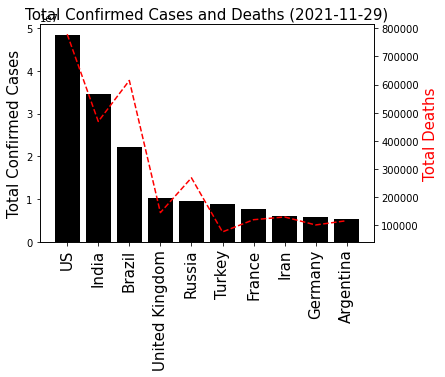

In [19]:
# 아래와 같이 나라별 누적 사망자 수와 확진자 수를 시각화하여 비교하기 (최신일자, 가장 많이 확진된 10국가)

top_ten_cases = df_case.loc[df_case.index[-1]].sort_values(ascending=False)[:10]
sns.barplot(x=top_ten_cases.index, y=top_ten_cases, color='black')
plt.xticks(rotation=90, size=15)
plt.ylabel('Total Confirmed Cases', size=15)
plt.xlabel('')
plt.title('Total Confirmed Cases and Deaths (%s)' % top_ten_cases.name.strftime('%Y-%m-%d'), size=15)

ax = plt.gca()
ax2 = ax.twinx()

top_ten_deaths = df_death.loc[df_death.index[-1]][top_ten_cases.index]
# plt.plot(top_ten_deaths.index, top_ten_deaths, 'r--')
ax2.plot(top_ten_deaths.index, top_ten_deaths, 'r--')
ax2.set_ylabel('Total Deaths', color='red', size=15)

plt.show()

### 문제 6. 특정 국가의 확진자 수 및 사망자 수 변화 시각화하기

In [23]:
# 나라별 시간에 따른 확진자 수 및 사망자 수 시각화하기

def plot_case_with_death(country):
  # TODO: 입력받은 국가의 누적 확진자/사망자 수 시각화
  plt.plot(df_case.index, df_case[country], 'b-')
  plt.ylabel('Confirmed Cases', color='blue')
  plt.title(country + ' Cases & Deaths')
  plt.xlabel('Date')
  plt.xlim(right=df_case.index[-1])
  plt.ylim(0, df_case[country].max()*1.1)

  ax = plt.gca()
  ax2 = ax.twinx()

  ax2.plot(df_death.index, df_death[country], 'r--')
  ax2.set_ylabel('Deaths', color='red')
  ax2.set_ylim(0, df_death[country].max()*1.3)

  plt.show()

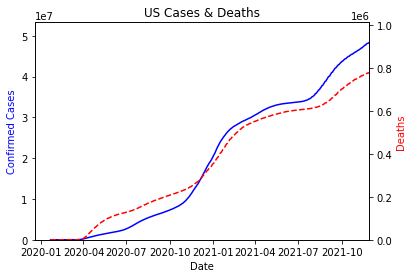

In [24]:
plot_case_with_death('US')

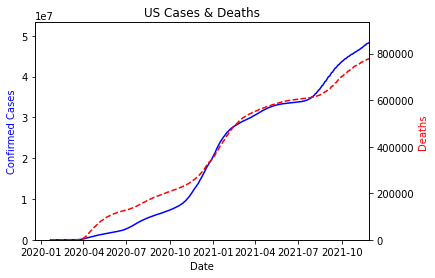

In [25]:
country = 'US'
plt.plot(df_case.index, df_case[country], 'b-')
plt.ylabel('Confirmed Cases', color='blue')
plt.title(country + ' Cases & Deaths')
plt.xlabel('Date')
plt.xlim(right=df_case.index[-1])
plt.ylim(0, df_case[country].max()*1.1)

ax = plt.gca()
ax2 = ax.twinx()

ax2.plot(df_death.index, df_death[country], 'r--')
ax2.set_ylabel('Deaths', color='red')
ax2.set_ylim(0, df_death[country].max()*1.2)

plt.show()

In [ ]:
for c in df_case.columns:
  print(c + ' ')

Afghanistan 
Albania 
Algeria 
Andorra 
Angola 
Antigua and Barbuda 
Argentina 
Armenia 
Australia 
Austria 
Azerbaijan 
Bahamas 
Bahrain 
Bangladesh 
Barbados 
Belarus 
Belgium 
Belize 
Benin 
Bhutan 
Bolivia 
Bosnia and Herzegovina 
Botswana 
Brazil 
Brunei 
Bulgaria 
Burkina Faso 
Burma 
Burundi 
Cabo Verde 
Cambodia 
Cameroon 
Canada 
Central African Republic 
Chad 
Chile 
China 
Colombia 
Comoros 
Congo (Brazzaville) 
Congo (Kinshasa) 
Costa Rica 
Cote d'Ivoire 
Croatia 
Cuba 
Cyprus 
Czechia 
Denmark 
Diamond Princess 
Djibouti 
Dominica 
Dominican Republic 
Ecuador 
Egypt 
El Salvador 
Equatorial Guinea 
Eritrea 
Estonia 
Eswatini 
Ethiopia 
Fiji 
Finland 
France 
Gabon 
Gambia 
Georgia 
Germany 
Ghana 
Greece 
Grenada 
Guatemala 
Guinea 
Guinea-Bissau 
Guyana 
Haiti 
Holy See 
Honduras 
Hungary 
Iceland 
India 
Indonesia 
Iran 
Iraq 
Ireland 
Israel 
Italy 
Jamaica 
Japan 
Jordan 
Kazakhstan 
Kenya 
Kiribati 
Korea, South 
Kosovo 
Kuwait 
Kyrgyzstan 
Laos 
Latvia 
Lebanon 
Leso

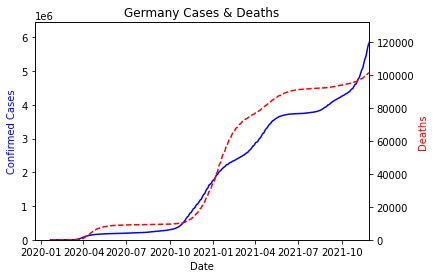

In [26]:
plot_case_with_death('Germany')

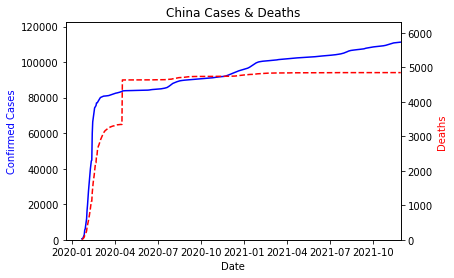

In [27]:
plot_case_with_death('China')

### 문제 7. 한국의 확진자 수 및 사망자 수 변화 시각화/분석하기

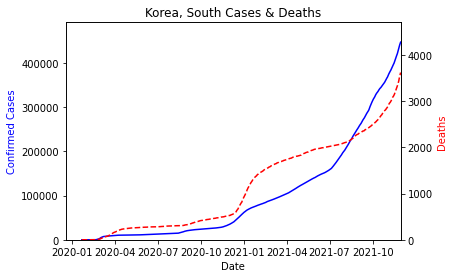

In [28]:
# 한국의 누적 확진자 수/사망자 수를 시각화하고 분석하시오.

plot_case_with_death('Korea, South')

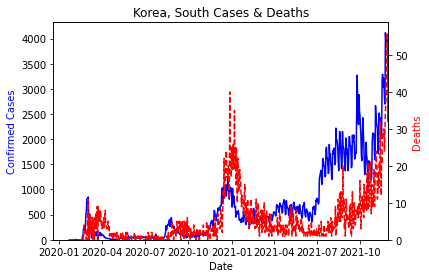

In [29]:
# 한국의 일일 확진자 수/사망자 수를 시각화하고 분석하시오.

country = 'Korea, South'
plt.plot(df_case.index, df_case[country].diff(), 'b-')
plt.ylabel('Confirmed Cases', color='blue')
plt.title(country + ' Cases & Deaths')
plt.xlabel('Date')
plt.xlim(right=df_case.index[-1])
plt.ylim(bottom=0)

ax = plt.gca()
ax2 = ax.twinx()

ax2.plot(df_death.index, df_death[country].diff(), 'r--')
ax2.set_ylabel('Deaths', color='red')
ax2.set_ylim(bottom=0)

plt.show()

## Step 3. Plotly를 이용하여 데이터 시각화하기

### 문제 8. Plotly의 Choropleth 데이터 포맷으로 맞추기

In [30]:
import plotly.graph_objects as go

In [31]:
# 아래 데이터프레임를 이용하여 국가명을 국가코드로 변경
df_code = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')

# Hint) 이름이 다르게 쓰인 국가의 이름을 먼저 변경한 후에 코드로 변경
country_renamer = {
    'Bahamas':'Bahamas, The',
    'Congo (Brazzaville)':'Congo, Republic of the',
    'Congo (Kinshasa)':'Congo, Democratic Republic of the',
    'Czechia':'Czech Republic',
    'Eswatini':'Swaziland',
    'Gambia':'Gambia, The',
    'North Macedonia':'Macedonia',
    'Taiwan*':'Taiwan',
    'US':'United States',
    'West Bank and Gaza':'West Bank'
}

In [ ]:
df_code

,COUNTRY,GDP (BILLIONS),CODE
0,Afghanistan,21.71,AFG
1,Albania,13.40,ALB
2,Algeria,227.80,DZA
3,American Samoa,0.75,ASM
4,Andorra,4.80,AND
...,...,...,...
217,Virgin Islands,5.08,VGB
218,West Bank,6.64,WBG
219,Yemen,45.45,YEM
220,Zambia,25.61,ZMB


In [32]:
# df_case.columns.map(country_renamer) 얘로 하면 country_renamer에 없는 애들은 전부 nan이 됨
df_case.rename(country_renamer, axis=1) # 얘로해야 없는애들은 유지, 있는애들은 바꿔줌

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,"Bahamas, The",Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,"Congo, Republic of the",...,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Summer Olympics 2020,Suriname,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,United States,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,...,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,...,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,6,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,...,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,8,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-25,157144,198292,209624,16566,65105,4141,5322127,336330,205269,1108889,580507,22696,277510,1575185,24432,646743,1679861,30060,24850,2633,533756,272063,194909,22055238,14771,684922,15514,520213,20360,38347,120009,106794,1787542,11708,5107,1751769,111077,5057897,4478,18837,...,6400,258785,1119111,411301,20,23016,2952500,12717,5121100,560345,42056,865,50656,1196688,978801,47664,16554,17493,26261,2094886,19820,26232,1,68288,716861,8678609,48125425,127337,3548842,741720,10076116,398676,192175,6,428453,1168228,459213,9977,210112,133774
2021-11-26,157171,198732,209817,16712,65130,4141,5324039,337005,206749,1121134,582504,22720,277536,1575424,24769,648472,1701633,30165,24850,2634,535115,272798,194909,22067630,14918,687410,15514,520706,20386,38353,120038,106794,1790579,11708,5107,1754443,111106,5060557,4482,18837,...,6401,259875,1131206,413664,20,23016,2955328,12717,5131012,561059,42056,865,50710,1198848,986834,47764,16566,17493,26261,2100959,19821,26236,1,69008,716988,8702611,48176523,127413,3565644,741790,10125945,398890,192381,6,429360,1181337,459479,9979,210118,133836
2021-11-27,157190,199137,209980,16712,65139,4141,5325560,337522,207984,1132805,584121,22734,277552,1575579,24769,650168,1701633,30165,24850,2636,535115,272798,194909,22076863,14992,688628,15711,521211,20386,38358,120064,106794,1792561,11708,5107,1757077,111132,5063177,4489,18837,...,6401,261636,1143068,415898,20,23016,2958548,12717,5131012,561778,42056,865,50741,1198848,986834,47764,16578,17493,26261,2100959,19822,26241,1,69680,717163,8726370,48201079,127423,3580671,741858,10165779,399181,192599,6,430046,1197404,459479,9981,210138,133836


In [33]:
country_to_code = df_code.set_index('COUNTRY')['CODE']
country_to_code

COUNTRY
Afghanistan       AFG
Albania           ALB
Algeria           DZA
American Samoa    ASM
Andorra           AND
                 ... 
Virgin Islands    VGB
West Bank         WBG
Yemen             YEM
Zambia            ZMB
Zimbabwe          ZWE
Name: CODE, Length: 222, dtype: object

In [34]:
df_c = df_case.rename(country_renamer, axis=1).copy()
for col in df_c:
  if col not in country_to_code.index:
    df_c.drop(col, axis=1, inplace=True)
df_code = df_c.rename(country_to_code, axis=1)
for c in df_code.columns:
  print(c, end=' ')

AFG ALB DZA AND AGO ATG ARG ARM AUS AUT AZE BHM BHR BGD BRB BLR BEL BLZ BEN BTN BOL BIH BWA BRA BRN BGR BFA MMR BDI CPV KHM CMR CAN CAF TCD CHL CHN COL COM COG COD CRI CIV HRV CUB CYP CZE DNK DJI DMA DOM ECU EGY SLV GNQ ERI EST SWZ ETH FJI FIN FRA GAB GMB GEO DEU GHA GRC GRD GTM GIN GNB GUY HTI HND HUN ISL IND IDN IRN IRQ IRL ISR ITA JAM JPN JOR KAZ KEN KIR KOR KSV KWT KGZ LAO LVA LBN LSO LBR LBY LIE LTU LUX MDG MWI MYS MDV MLI MLT MHL MRT MUS MEX MDA MCO MNG MNE MAR MOZ NAM NPL NLD NZL NIC NER NGA MKD NOR OMN PAK PLW PAN PNG PRY PER PHL POL PRT QAT ROU RUS RWA KNA LCA VCT WSM SMR STP SAU SEN SRB SYC SLE SGP SVK SVN SLB SOM ZAF SSD ESP LKA SDN SUR SWE CHE SYR TWN TJK TZA THA TLS TGO TON TTO TUN TUR USA UGA UKR ARE GBR URY UZB VUT VEN VNM WBG YEM ZMB ZWE 

In [ ]:
df_code

Country/Region,AFG,ALB,DZA,AND,AGO,ATG,ARG,ARM,AUS,AUT,AZE,BHM,BHR,BGD,BRB,BLR,BEL,BLZ,BEN,BTN,BOL,BIH,BWA,BRA,BRN,BGR,BFA,MMR,BDI,CPV,KHM,CMR,CAN,CAF,TCD,CHL,CHN,COL,COM,COG,...,SYC,SLE,SGP,SVK,SVN,SLB,SOM,ZAF,SSD,ESP,LKA,SDN,SUR,SWE,CHE,SYR,TWN,TJK,TZA,THA,TLS,TGO,TON,TTO,TUN,TUR,USA,UGA,UKR,ARE,GBR,URY,UZB,VUT,VEN,VNM,WBG,YEM,ZMB,ZWE
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,...,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,...,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,6,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,...,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,8,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-18,156739,195021,208532,16035,64985,4129,5312089,331914,195617,1011465,568089,22640,277304,1573458,23175,634731,1559998,29501,24846,2629,527380,267851,194445,21989962,14399,668363,15514,516146,20321,38313,119741,106190,1767962,11666,5107,1735187,110899,5040665,4437,18539,...,22833,6400,244815,1040996,391677,20,22837,2926914,12609,5074027,554459,41558,50356,1187607,935047,46838,16506,17489,26227,2044125,19814,26185,1,64402,715988,8505190,47531319,127073,3440602,741214,9772670,397318,190584,6,422229,1065469,457729,9950,210036,133593
2021-11-19,156812,195523,208695,16086,64997,4131,5313607,332713,196977,1027274,570322,22655,277322,1573711,23426,636543,1581500,29501,24846,2632,527380,268572,194445,22003317,14444,671100,15514,516770,20332,38321,119786,106190,1770775,11666,5107,1737885,110923,5042822,4437,18717,...,22895,6400,248587,1051745,395203,20,22969,2928288,12638,5080663,555204,41558,50356,1188735,941218,46966,16516,17489,26227,2050980,19816,26199,1,64893,716074,8529000,47660379,127128,3461873,741291,9817505,397549,190850,6,423633,1075094,457950,9954,210043,133593
2021-11-20,156864,195988,208839,16086,65011,4135,5314702,333583,198442,1042571,572085,22655,277348,1573889,23623,638402,1581500,29501,24846,2632,528407,268572,194445,22012150,14444,672555,15514,517395,20332,38324,119826,106190,1772484,11666,5107,1740496,110943,5045412,4440,18717,...,22895,6400,250518,1064680,398439,20,22969,2929175,12638,5080663,555929,41558,50410,1188735,941218,47091,16520,17489,26227,2057575,19819,26199,1,65485,716183,8552347,47701872,127128,3481347,741370,9857658,397712,191122,6,424441,1084625,457950,9955,210057,133615


In [35]:
# 공식 레퍼런스 참조: https://plotly.com/python/choropleth-maps/#world-choropleth-map
def get_choropleth_data(date):
  # TODO: date에 해당하는 날짜로 데이터 생성
  data = go.Choropleth(
      locations = df_code.columns,
      z = df_code.loc[date],
      text = df_c.columns,
      colorscale = 'Blues',
      autocolorscale=False,
      reversescale=True,
      marker_line_color='darkgray',
      marker_line_width=0.5,
      colorbar_tickprefix = '',
      colorbar_title = 'Confirmed Cases',
  )
  return data

### 문제 9. Choropleth map 시각화하기

In [36]:
# 공식 레퍼런스 참조: https://plotly.com/python/choropleth-maps/#world-choropleth-map

date = df_case.index[-1]
data = get_choropleth_data(date)
fig = go.Figure(data=data)
fig.update_layout(
    title_text='Confirmed Cases in ' + str(date),
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
)
fig.show()

## Step 4. 모델 학습을 위한 데이터 전처리 

### 문제 10. FBProphet 학습을 위한 데이터프레임 생성

In [37]:
df_case.reset_index()[['Date', 'Korea, South']].to_numpy()

array([[Timestamp('2020-01-22 00:00:00'), 1],
       [Timestamp('2020-01-23 00:00:00'), 1],
       [Timestamp('2020-01-24 00:00:00'), 2],
       ...,
       [Timestamp('2021-11-27 00:00:00'), 440896],
       [Timestamp('2021-11-28 00:00:00'), 444200],
       [Timestamp('2021-11-29 00:00:00'), 447230]], dtype=object)

In [38]:
# 공식 레퍼런스 참조: https://facebook.github.io/prophet/docs/quick_start.html#python-api
# 한국의 확진자 수 데이터를 FBProphet에 학습하기 위한 데이터프레임으로 재구성하시오.

df = pd.DataFrame(df_case.reset_index()[['Date', 'Korea, South']].to_numpy(), columns=['ds', 'y'])
df

,ds,y
0,2020-01-22,1
1,2020-01-23,1
2,2020-01-24,2
3,2020-01-25,2
4,2020-01-26,3
...,...,...
673,2021-11-25,432901
674,2021-11-26,436968
675,2021-11-27,440896
676,2021-11-28,444200


### 문제 11. 학습데이터와 테스트데이터 분리하기


In [39]:
from math import floor

In [40]:
def train_test_split_df(df, test_size):
  # TODO: test_size(0 < test_size < 1) 비율에 따라 테스트/학습 데이터프레임으로 나누어 반환
  div = floor(df.shape[0] * (1 - test_size))
  return df.loc[:div], df.loc[div + 1:]

In [41]:
train_df, test_df = train_test_split_df(df, 0.1)

In [42]:
train_df.shape, test_df.shape

((611, 2), (67, 2))

In [43]:
train_df.tail(2), test_df.head(2)

(            ds       y
 609 2021-09-22  292699
 610 2021-09-23  295132,             ds       y
 611 2021-09-24  298402
 612 2021-09-25  301172)

## Step 5. Prophet 모델 학습하기

### 문제 12. Prophet 모델 생성 및 학습 데이터 학습하기

In [44]:
from fbprophet import Prophet

In [45]:
model = Prophet(changepoint_range=1.0)
model.fit(train_df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### 문제 13. Prophet 모델 학습 결과 시각화하기

In [46]:
from fbprophet.plot import add_changepoints_to_plot

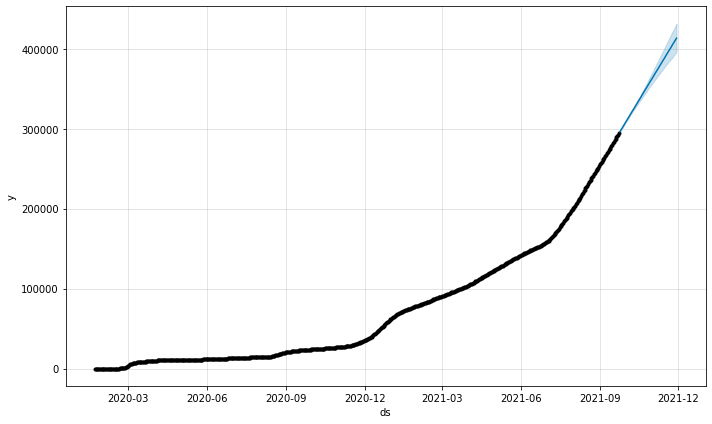

In [47]:
# model.plot() 메소드, model.plot_components() 메소드, add_changepoints_to_plot() 메소드 활용

pred = model.predict(test_df)
model.plot(pred);

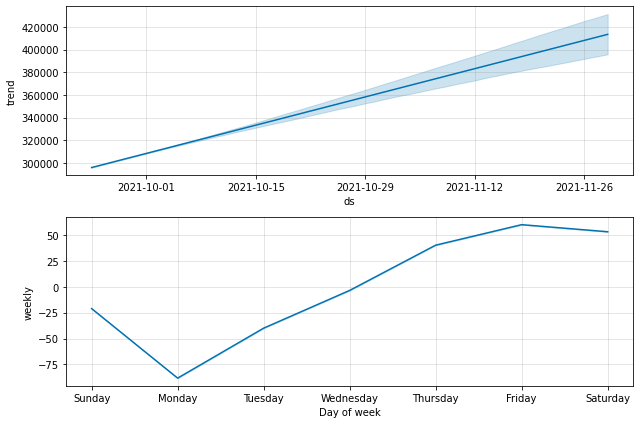

In [48]:
model.plot_components(pred);

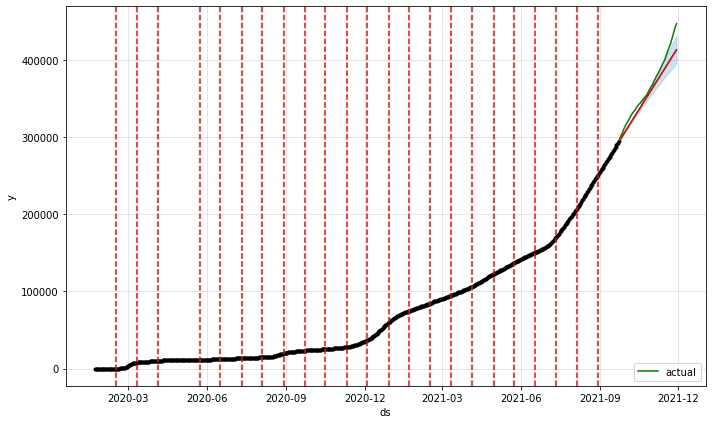

In [49]:
fig = model.plot(pred)
plt.plot(test_df['ds'], test_df['y'], 'g-', label='actual')
add_changepoints_to_plot(fig.gca(), model, pred)
plt.legend()

### 문제 14. 모델 학습 결과 평가하기

In [50]:
from sklearn.metrics import r2_score

In [51]:
pred.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-09-24,296135.126539,295575.726366,296832.718196,296135.126539,296135.126539,59.871980,59.871980,59.871980,59.871980,59.871980,59.871980,0.0,0.0,0.0,296194.998519
1,2021-09-25,297911.312611,297340.721083,298648.137548,297911.312611,297911.312611,53.038778,53.038778,53.038778,53.038778,53.038778,53.038778,0.0,0.0,0.0,297964.351389
2,2021-09-26,299687.498683,299034.479099,300315.039381,299687.498683,299687.498683,-21.130395,-21.130395,-21.130395,-21.130395,-21.130395,-21.130395,0.0,0.0,0.0,299666.368287
3,2021-09-27,301463.684754,300653.090112,302065.701096,301463.684754,301463.684754,-88.242076,-88.242076,-88.242076,-88.242076,-88.242076,-88.242076,0.0,0.0,0.0,301375.442679
4,2021-09-28,303239.870826,302467.450029,303896.877110,303239.870826,303239.870826,-40.020311,-40.020311,-40.020311,-40.020311,-40.020311,-40.020311,0.0,0.0,0.0,303199.850515


In [52]:
# test_df와 pred를 비교하여 r2_score 평가
# 1에 가까우면 예측이 잘된거

print('R2 Score: ', r2_score(test_df['y'], pred['yhat']))

R2 Score:  0.9036926113859326


### 문제 15. Prophet 모델로 미래 30일 데이터 예측하기

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


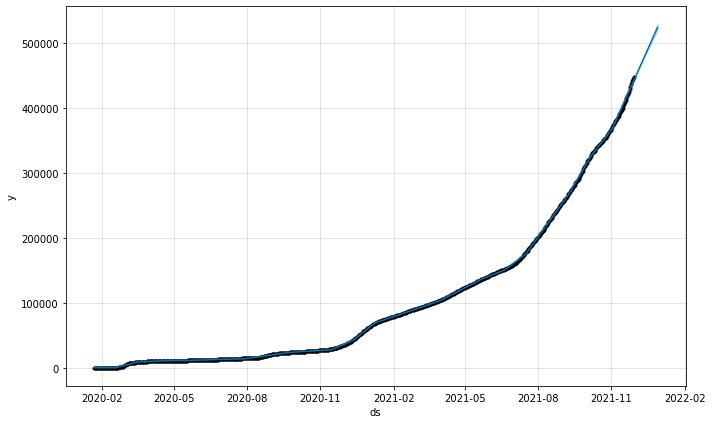

In [53]:
# 전체 df를 학습한 후, 향후 30일에 대한 데이터 예측하기
# Hint) make_future_dataframe() 메소드 활용

model = Prophet(changepoint_range=1.0)
model.fit(df)
future = model.make_future_dataframe(30)
pred = model.predict(future)
model.plot(pred);

## Step 6. IF-CASE 예측해보기


### 문제 16. 한국 확진자 수 변화의 특별한 이벤트 확인하기


In [54]:
# 코로나 확산 초기, 한국의 확진자 수가 급증한 시점 찾기

df[df['y'].diff() == df['y'].diff().max()]

,ds,y
671,2021-11-23,425065


In [55]:
df['y'].diff().sort_values(ascending=False)[:30]

671    4115
674    4067
672    3937
675    3928
673    3899
676    3304
665    3290
611    3270
667    3212
664    3184
668    3114
666    3034
677    3030
615    2883
669    2827
612    2770
670    2698
650    2666
616    2564
658    2520
617    2484
651    2480
610    2433
623    2425
657    2424
661    2418
613    2381
659    2368
652    2344
660    2323
Name: y, dtype: object

In [56]:
df.loc[660:670].diff()

,ds,y
660,NaT,NaN
661,1 days,2418
662,1 days,2006
663,1 days,2125
664,1 days,3184
665,1 days,3290
666,1 days,3034
667,1 days,3212
668,1 days,3114
669,1 days,2827


### 문제 17. 이벤트가 없었을 경우 한국의 확진자 수 변화 예측하기


In [57]:
# 확진자 수가 급증하기 전 데이터를 학습 후, 해당 시점으로부터 30일 간의 데이터 예측하여 실제 값과 비교하기

df.loc[:663]

,ds,y
0,2020-01-22,1
1,2020-01-23,1
2,2020-01-24,2
3,2020-01-25,2
4,2020-01-26,3
...,...,...
659,2021-11-11,390719
660,2021-11-12,393042
661,2021-11-13,395460
662,2021-11-14,397466


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


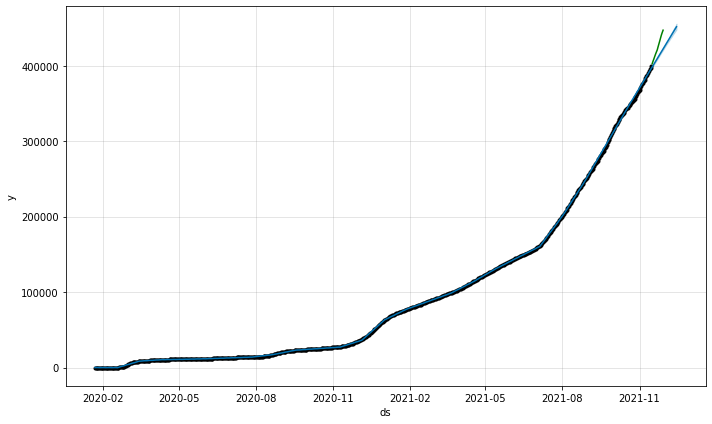

In [58]:
model = Prophet(changepoint_range=1.0)
model.fit(df.loc[:663])
future = model.make_future_dataframe(30)
pred = model.predict(future)
model.plot(pred);
plt.plot(df.loc[664:]['ds'], df.loc[664:]['y'], 'g-')
plt.show()